In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1_QxJlcifVbiTIKwXcbHDq9Dwwcw7UmBc'

In [0]:
fluff, id = link.split('=')
print (id)

1_QxJlcifVbiTIKwXcbHDq9Dwwcw7UmBc


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Stock.csv')  
ip = pd.read_csv('Stock.csv')

In [0]:
ip

,Date,Open,High,Low,Close,Volume,OpenInt
0,18-11-1999,30.713,33.754,27.002,29.702,66277506,0
1,19-11-1999,28.986,29.027,26.872,27.257,16142920,0
2,22-11-1999,27.886,29.702,27.044,29.702,6970266,0
3,23-11-1999,28.688,29.446,27.002,27.002,6332082,0
4,24-11-1999,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,06-11-2017,68.220,68.450,68.220,68.220,995731,0
4517,07-11-2017,68.320,68.640,68.040,68.250,966466,0
4518,08-11-2017,68.100,68.330,67.771,68.110,972616,0
4519,09-11-2017,67.920,67.980,66.910,67.470,1673083,0


In [0]:
X=ip.drop('Close',axis=1).drop('Date',axis=1)
y=ip['Close']

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
X

array([[0.23950492, 0.25761933, 0.21933581, 1.        , 0.        ],
       [0.22189629, 0.21121072, 0.21790398, 0.24356559, 0.        ],
       [0.2106806 , 0.21783771, 0.2197984 , 0.1051679 , 0.        ],
       ...,
       [0.62070579, 0.59707862, 0.66836723, 0.0146749 , 0.        ],
       [0.6188705 , 0.5936424 , 0.65888415, 0.0252436 , 0.        ],
       [0.61305873, 0.58971529, 0.6565712 , 0.02571836, 0.        ]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [0]:
target = y_train

In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)          

In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(X_train, target, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)




Train on 3254 samples, validate on 814 samples
Epoch 1/100





3254/3254 [==============================] - 1s 446us/step - loss: 7.7917 - mean_absolute_error: 7.7917 - val_loss: 2.7874 - val_mean_absolute_error: 2.7874

Epoch 00001: val_loss improved from inf to 2.78741, saving model to Weights-001--2.78741.hdf5
Epoch 2/100
3254/3254 [==============================] - 1s 213us/step - loss: 0.8341 - mean_absolute_error: 0.8341 - val_loss: 0.3096 - val_mean_absolute_error: 0.3096

Epoch 00002: val_loss improved from 2.78741 to 0.30957, saving model to Weights-002--0.30957.hdf5
Epoch 3/100
3254/3254 [==============================] - 1s 209us/step - loss: 0.6824 - mean_absolute_error: 0.6824 - val_loss: 0.6037 - val_mean_absolute_error: 0.6037

Epoch 00003: val_loss did not improve from 0.30957
Epoch 4/100
3254/3254 [==============================] - 1s 209us/step - loss: 0.6150 - mean_absolute_error: 0.6150 - val_loss: 0.4018 - val_mean_absolute_error: 0.4018

Epoch 00004: val_loss 

In [0]:
pred=NN_model.predict(X_test)

In [0]:
pred

array([[55.41412  ],
       [21.385706 ],
       [13.389876 ],
       [36.369118 ],
       [40.73919  ],
       [25.393713 ],
       [30.367216 ],
       [45.703    ],
       [22.936586 ],
       [13.816295 ],
       [45.723118 ],
       [32.339653 ],
       [20.666319 ],
       [26.108442 ],
       [20.942266 ],
       [20.121084 ],
       [14.45753  ],
       [38.540764 ],
       [38.636745 ],
       [19.252893 ],
       [21.564253 ],
       [22.257643 ],
       [24.500956 ],
       [ 9.44093  ],
       [12.579095 ],
       [27.47746  ],
       [37.685204 ],
       [12.608315 ],
       [45.418884 ],
       [14.7004175],
       [50.08927  ],
       [23.945822 ],
       [16.584112 ],
       [40.326317 ],
       [24.226221 ],
       [41.650047 ],
       [17.782454 ],
       [30.058496 ],
       [24.669142 ],
       [20.646084 ],
       [23.32104  ],
       [38.895313 ],
       [44.34388  ],
       [51.314785 ],
       [31.228113 ],
       [25.411758 ],
       [25.95297  ],
       [20.77

In [0]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)
print(test_set_rmse)
print(test_set_r2)
print(test_set_mae)

0.6156230649383455
0.9977145815204395
0.39259326652206855


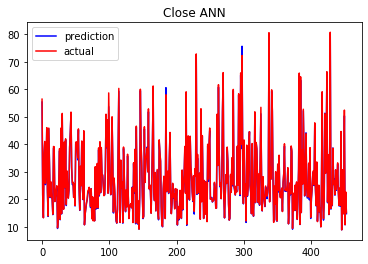

In [0]:
x=np.arange(0,453)
plt.title('Close ANN')
plt.plot(x,pred,'b-',label='prediction')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

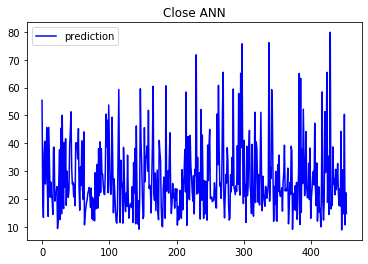

In [0]:
x=np.arange(0,453)
plt.title('Close ANN')
plt.plot(x,pred,'b-',label='prediction')
plt.legend()
plt.show()

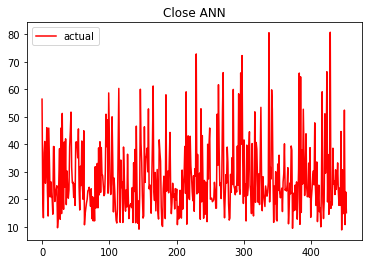

In [0]:
x=np.arange(0,453)
plt.title('Close ANN')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()